## Multiple Linear Regression

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import the dataset

df = pd.read_csv('economic_index (1).csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256



Remove unwanted Columns

In [4]:
 df.drop(columns=['Unnamed: 0', 'year','month'],axis=1,inplace =True)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


Check for null values

In [6]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

Let's do some visualisation

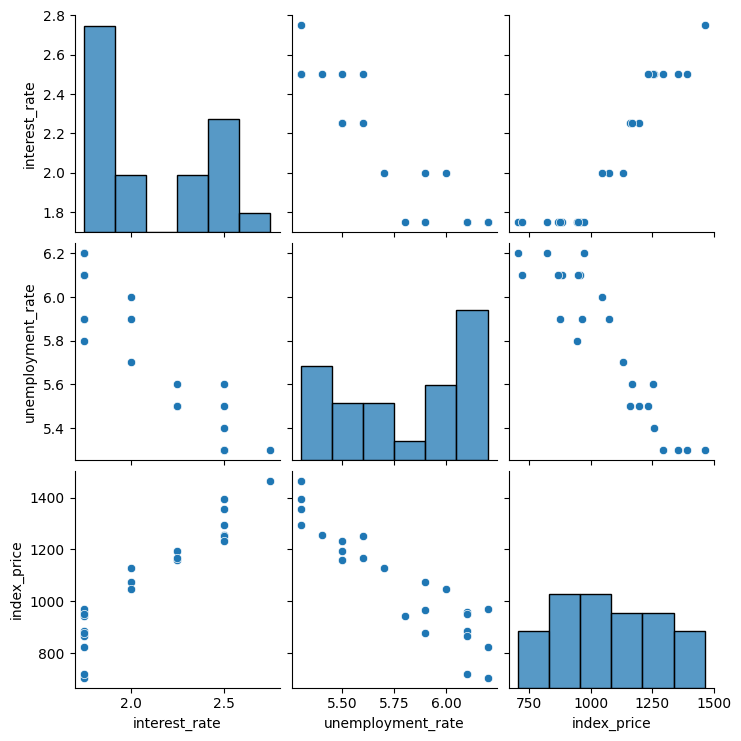

In [7]:
sns.pairplot(df) #linear relationship, inverse relationship

In [8]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Visualise the data points more closely

Text(0.5, 1.0, 'relationship between interest rate and unemployment rate')

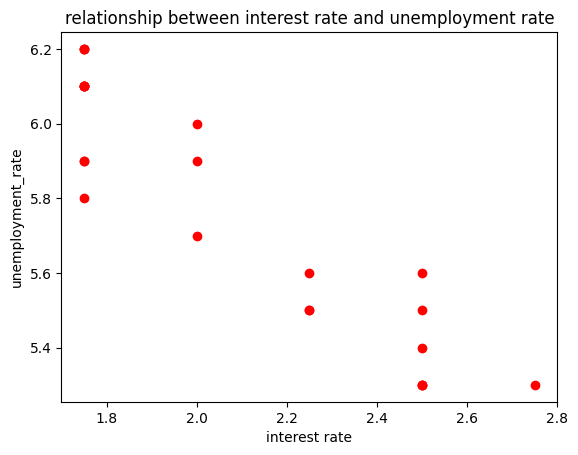

In [9]:
plt.scatter(df['interest_rate'], df['unemployment_rate'],color= 'r')
plt.xlabel("interest rate")
plt.ylabel("unemployment_rate")
plt.title("relationship between interest rate and unemployment rate")

Inverse relationship has occured

## Independent and Dependent Features

In [10]:
X = df[['interest_rate','unemployment_rate']] #another way X = df.iloc[:,:-1]
y = df['index_price'] #another way y = df.iloc[:,-1] 
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [12]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

## Train test split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

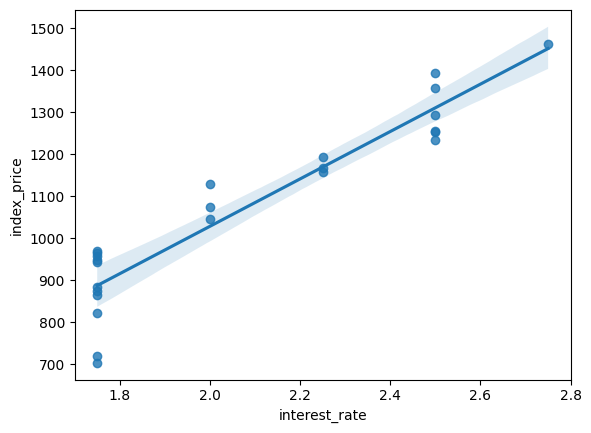

In [14]:
#visualise
sns.regplot(x= df['interest_rate'],y = df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

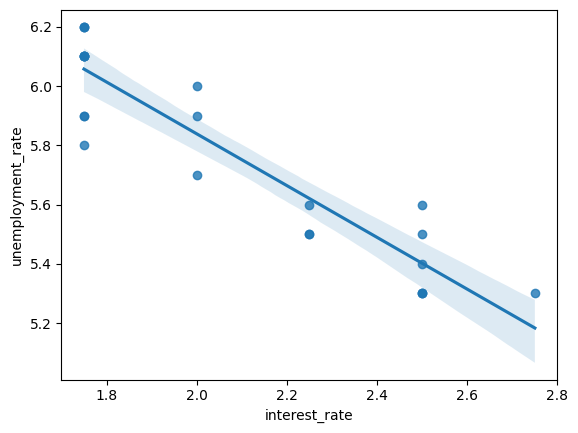

In [15]:

sns.regplot(x= df['interest_rate'],y = df['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

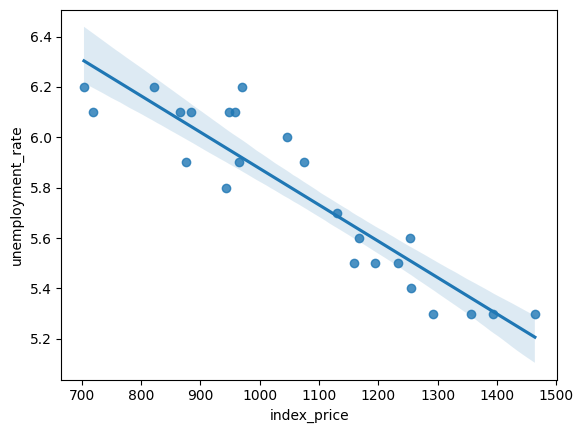

In [16]:

sns.regplot(x= df['index_price'],y = df['unemployment_rate'])

## Standardization

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [19]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()


In [20]:
regression.fit(X_train,y_train)

LinearRegression()

## Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
print(validation_score)

[-4921.61331265 -7686.87497294 -5135.9962549 ]


In [22]:
np.mean(validation_score)

np.float64(-5914.8281801623925)

## Prediction

In [23]:
y_pred = regression.predict(X_test)

print(y_pred)

[1204.22770398  821.65051903 1406.51300368  857.70889608  994.90992298
 1168.16932693]


## Performance metrics

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.76288771258
59.93578152323554
76.11677139574813


In [25]:
score = r2_score(y_test, y_pred)
print(score)

0.8278978091457142


In [26]:
# adjusted r2

1 - (1-score)*(len(y_test)-1) / (len(y_test) - (X_test.shape[1]-1))

0.8278978091457142

## Assumptions

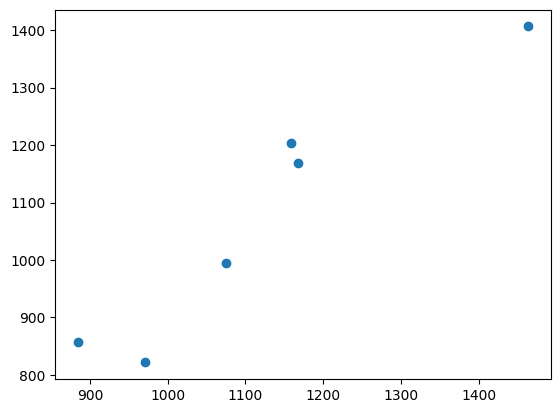

In [27]:
#1 Linear Relationship

#After prediction , if there is a linear relationship between y_test, y_pred, then it means the model is performing well

plt.scatter(y_test,y_pred)


In [28]:
#2 Residuals

#find residuals and plot and if it follows normal distribution then it means the model is good

residuals= y_test-y_pred
print(residuals)


8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


/var/folders/4v/zjjpj02j0f59s5fjqq0twgp40000gn/T/ipykernel_28312/24933098.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: xlabel='index_price', ylabel='Density'>

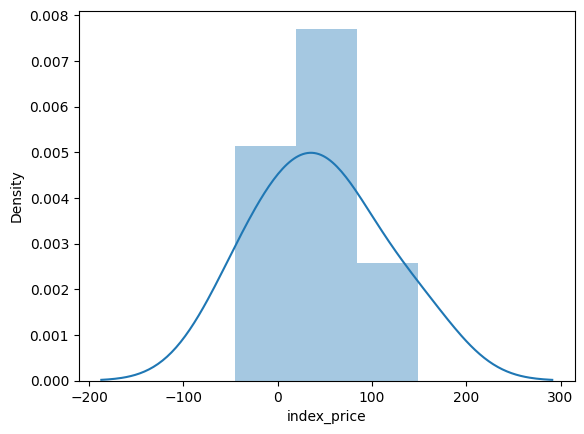

In [29]:
#plot dist plot
sns.distplot(residuals, kde=True)

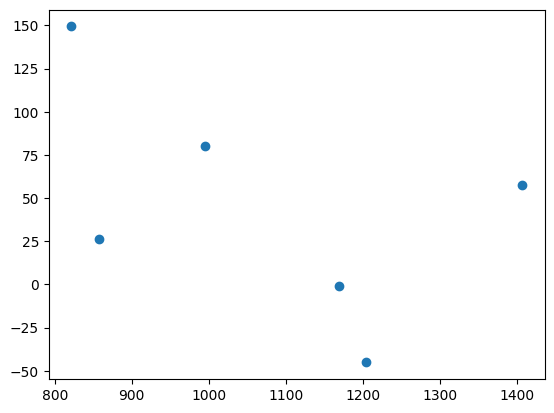

In [30]:
#3 scatter plot with respect to predictions and residuals
#if it follows uniform distribution then the model is good (i.e no pattern) uniformly distributed

plt.scatter(y_pred,residuals)

## OLS  Regression

In [31]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

In [32]:
model.summary()

/Users/arunekambaram/code/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 26 Apr 2025   Prob (F-statistic):                       0.754
Time:                        14:06:39   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
print(regression.coef_)

[  88.27275507 -116.25716066]
